## <center>**Proyecto Individual N°2**</center>
## <center>**EDA**</center>


En el presente notebook llevaremos a cabo el analisis exploratorio de los datos (EDA). Estudiaremos la relacion entre las variables, trataremos y procesaremos los datos en caso de ser necesario.*

Cada paso sera comentado y llegado el caso de extraer conclusiones, se plasmaran resumidamente.

<sub>* si bien primeramente en otro archivo se realizo el proceso de ETL, en el desarrollo del EDA, puede ser necesario seguir trabajando los datos, por lo tanto consideramos complementarios ambos procedimientos.</sub>


* Importacion de librerias necesarias:

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Teniendo en cuenta que el notebook de ETL realizamos el merge de las hojas hechos y victimas tanto para el libro lesiones como para homicidios, A continuacion trabajaremos con esos dos finales archivos creados.

* lectura de los archivos:

In [2]:
df_homicidios = pd.read_csv(r'Data/homicidios_df.csv')
df_lesiones = pd.read_csv(r'Data/lesiones_df.csv')

In [3]:
df_homicidios.head(2)

,id_hecho,n_victimas,fecha,franja_horaria,direccion_normalizada,comuna,longitud,latitud,victima,acusado,rol,sexo,edad,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,4.0,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.47533969,-34.68757022,MOTO,AUTO,CONDUCTOR,masculino,19.0,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,1.0,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.50877521,-34.66977709,AUTO,PASAJEROS,CONDUCTOR,masculino,70.0,2016-01-02 00:00:00


In [4]:
df_lesiones.head(2)

,id_hecho,n_victimas,franja_hora,comuna,tipo_calle,otra_direccion,longitud,latitud,victima,acusado,gravedad,fecha_y,sexo,edad
0,LC-2019-0000179,1,9.0,14,NaN,"Obligado Rafael, Av.Costanera 3300, Barrio: Pa...",-58.408911,-34.559658,CICLISTA,NaN,leve,2019-01-01,NaN,NaN
1,LC-2019-0000053,1,1.0,8,NaN,"Autopista Presidente Héctor J. Cámpora y Roca,...",-58.443510,-34.669125,AUTO,NaN,leve,2019-01-01,masculino,57.0


* Analisis de datos nulos

In [5]:
df_homicidios.isnull().sum()

id_hecho                  0
n_victimas                0
fecha                     0
franja_horaria            0
direccion_normalizada     8
comuna                    0
longitud                  0
latitud                   0
victima                   9
acusado                  23
rol                      11
sexo                      6
edad                     53
FECHA_FALLECIMIENTO      68
dtype: int64

podemos observar que en este caso no son demasiados los nulos por lo que decidimos trabajar con la existencia de estos en nuestros proximos analisis

In [6]:
df_lesiones.isnull().sum()

id_hecho              0
n_victimas            0
franja_hora           8
comuna             1114
tipo_calle        12879
otra_direccion    21138
longitud           1656
latitud            1656
victima           12822
acusado           17918
gravedad              0
fecha_y               0
sexo               2228
edad               4471
dtype: int64

en este caso podemos observar que varias de columnas poseen valores nulos pero no se eliminaran ya que puede resultar en sesgos considerando que son datos sensibes

* Analizo el tamaño de ambos df

In [7]:
print('el tamaño del archivo homicidios es: ', df_homicidios.shape)
print('el tamaño del archivo lesiones es: ', df_lesiones.shape)

el tamaño del archivo homicidios es:  (717, 14)
el tamaño del archivo lesiones es:  (27598, 14)


## ***Analisis df_homicidios***:

analizo los datos nulos que tiene la columna direccion_normalizada del df_homicidios y completo con la informacion que me brindan los datos de longitud y latitud por medio de la pagina [coordenadas.gps](https://www.coordenadas-gps.com/)

In [8]:
df_homicidios[df_homicidios.direccion_normalizada.isnull()]

,id_hecho,n_victimas,fecha,franja_horaria,direccion_normalizada,comuna,longitud,latitud,victima,acusado,rol,sexo,edad,FECHA_FALLECIMIENTO
39,2016-0052,1,2016-04-20,20.0,NaN,13,-58.46743471,-34.53476874,MOTO,NaN,NaN,NaN,NaN,NaN
108,2016-0136,1,2016-10-25,0.0,NaN,4,-58.408791,-34.652732,MOTO,CARGAS,CONDUCTOR,NaN,NaN,NaN
186,2017-0050,2,2017-04-28,11.0,NaN,9,-58.48501341,-34.64742455,MOTO,CARGAS,CONDUCTOR,masculino,46.0,2017-04-28 00:00:00
187,2017-0050,2,2017-04-28,11.0,NaN,9,-58.48501341,-34.64742455,MOTO,CARGAS,PASAJERO_ACOMPAÑANTE,masculino,16.0,2017-04-28 00:00:00
188,2017-0051,1,2017-05-01,3.0,NaN,7,-58.43614426,-34.6542464,AUTO,AUTO,CONDUCTOR,masculino,33.0,2017-05-01 00:00:00
327,2018-0039,1,2018-04-21,22.0,NaN,14,-58.42260225,-34.56403694,PEATON,AUTO,PEATON,masculino,37.0,2018-04-21 00:00:00
564,2020-0026,1,2020-05-17,6.0,NaN,14,-58.42260225,-34.56403694,MOTO,OBJETO FIJO,CONDUCTOR,masculino,28.0,2020-05-17 00:00:00
642,2021-0023,1,2021-03-01,9.0,NaN,4,-58.408791,-34.652732,MOTO,CARGAS,CONDUCTOR,masculino,24.0,2021-03-01 00:00:00


In [9]:
direcciones = [
    (39, 'Avenida del Libertador 14, Vicente Lopez'),
    (108, 'Diogenes Taborda 1178, Nueva Pompeya'),
    (186, 'Mozart 1001, Parque Avellaneda'),
    (187, 'Mozart 1001, Parque Avellaneda'),
    (188, 'Avenida General Francisco Fernández de La Cruz, Flores'),
    (327, 'Avenida Presidente Figueroa Alcorta, Palermo'),
    (564, 'Avenida Presidente Figueroa Alcorta, Palermo'),
    (642, 'Diogenes Taborda 1178, Nueva Pompeya')
]

# iterar sobre la lista de direcciones y completar los datos 
for fila, direccion in direcciones:
    df_homicidios.loc[fila, 'direccion_normalizada'] = direccion

In [10]:
df_homicidios.loc[[39,108,186,187,188,327,564,642]]

,id_hecho,n_victimas,fecha,franja_horaria,direccion_normalizada,comuna,longitud,latitud,victima,acusado,rol,sexo,edad,FECHA_FALLECIMIENTO
39,2016-0052,1,2016-04-20,20.0,"Avenida del Libertador 14, Vicente Lopez",13,-58.46743471,-34.53476874,MOTO,NaN,NaN,NaN,NaN,NaN
108,2016-0136,1,2016-10-25,0.0,"Diogenes Taborda 1178, Nueva Pompeya",4,-58.408791,-34.652732,MOTO,CARGAS,CONDUCTOR,NaN,NaN,NaN
186,2017-0050,2,2017-04-28,11.0,"Mozart 1001, Parque Avellaneda",9,-58.48501341,-34.64742455,MOTO,CARGAS,CONDUCTOR,masculino,46.0,2017-04-28 00:00:00
187,2017-0050,2,2017-04-28,11.0,"Mozart 1001, Parque Avellaneda",9,-58.48501341,-34.64742455,MOTO,CARGAS,PASAJERO_ACOMPAÑANTE,masculino,16.0,2017-04-28 00:00:00
188,2017-0051,1,2017-05-01,3.0,Avenida General Francisco Fernández de La Cruz...,7,-58.43614426,-34.6542464,AUTO,AUTO,CONDUCTOR,masculino,33.0,2017-05-01 00:00:00
327,2018-0039,1,2018-04-21,22.0,"Avenida Presidente Figueroa Alcorta, Palermo",14,-58.42260225,-34.56403694,PEATON,AUTO,PEATON,masculino,37.0,2018-04-21 00:00:00
564,2020-0026,1,2020-05-17,6.0,"Avenida Presidente Figueroa Alcorta, Palermo",14,-58.42260225,-34.56403694,MOTO,OBJETO FIJO,CONDUCTOR,masculino,28.0,2020-05-17 00:00:00
642,2021-0023,1,2021-03-01,9.0,"Diogenes Taborda 1178, Nueva Pompeya",4,-58.408791,-34.652732,MOTO,CARGAS,CONDUCTOR,masculino,24.0,2021-03-01 00:00:00


* con las direcciones completas creare una nube de palabras para a simple vista, poder tener un resumen de aquellas direcciones en las que han ocurrido los homicidios:

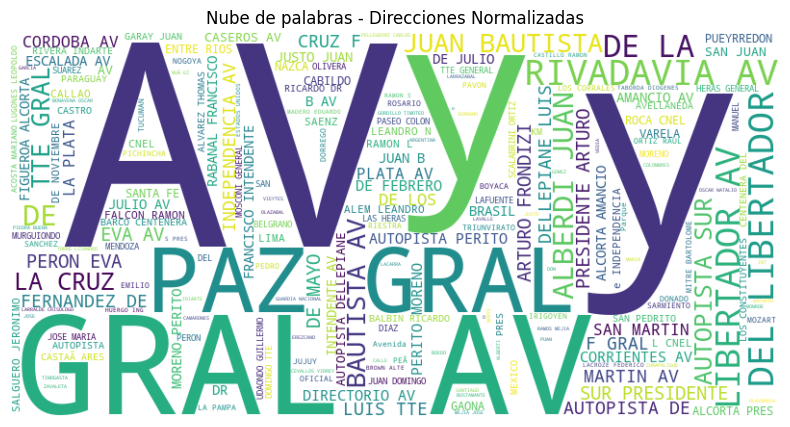

In [11]:
from wordcloud import WordCloud

# Unir todas las direcciones en un solo texto
texto_direcciones = ' '.join(df_homicidios['direccion_normalizada'].dropna())

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_direcciones)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras - Direcciones Normalizadas')
plt.show()


A primera vista, es evidente que la palabra mas destacada es 'AV' y, por consiguiente, 'GRAL PAZ', lo que sugiere que los principales accidentes ocurren en AV.GRAL PAZ. Sin embargo, no podemos pasar por alto el hecho de que 'AV' puede referirse a otras direcciones que tambien sean consideradas avenidas. En conclusion, podemos afirmar que la mayoria de los casos de siniestros ocurren en las avenidas; como por ejemplo, 'RIVADAVIA, LIBERTADOR, ALBERDI, JUAN BAUTISTA'entre otras mostradas.

* por otro lado, procedemos a cambiar el formato de la fecha a datetime en ambos archivos

In [12]:
# renombramos la columna fecha_y antes de cambiar el formato
df_lesiones.rename(columns={'fecha_y': 'fecha'})

#cambiamos el formato
df_lesiones['fecha_y'] = pd.to_datetime(df_lesiones['fecha_y'])

In [13]:
df_homicidios['fecha'] = pd.to_datetime(df_homicidios['fecha'])

* doy un pantallazo de la frecuencia de aparicion que tienen las comunas en df_homicidios para estudiar la presencia de los homicidios en las mismas

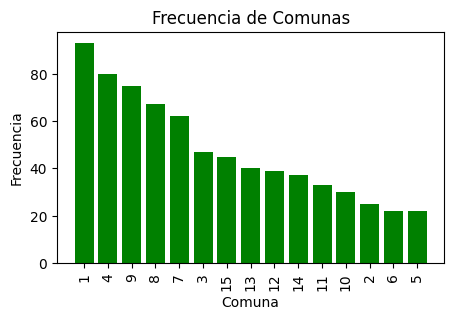

In [14]:
frecuencia_comuna = df_homicidios['comuna'].value_counts()

# Filtrar solo las comunas que tienen frecuencia mayor que cero
frecuencia_comuna = frecuencia_comuna[frecuencia_comuna > 0]

# Crear el histograma
plt.figure(figsize=(5, 3))
plt.bar(range(1, len(frecuencia_comuna) + 1), frecuencia_comuna.values, color='green')
plt.xlabel('Comuna')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Comunas')
plt.xticks(range(1, len(frecuencia_comuna) + 1), frecuencia_comuna.index, rotation=90)  
plt.show()


conociendo los barrios que integran cada comuna: </br>

comuna 1 Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución </br>
comuna 2 Recoleta</br>
comuna 3 Balvanera y San Cristóbal</br>
comuna 4 La Boca, Barracas, Parque Patricios y Nueva Pompeya</br>
comuna 5 Almagro y Boedo</br>
comuna 6 Caballito</br>
comuna 7 Flores y Parque Chacabuco</br>
comuna 8 Villa Soldati, Villa Riachuelo y Villa Lugano</br>
comuna 9 Liniers, Mataderos y Parque Avellaneda</br>
comuna 10 Villa Real, Monte Castro, Versalles, Floresta, Vélez Sarfield y Villa Luro</br>
comuna 11 Villa General Mitre, Villa Devoto, Villa del Parque y Villa Santa Rita</br>
comuna 12 Coghlan, Saavedra, Villa Urquiza y Villa Pueyrredón</br>
comuna 13 Núñez, Belgrano y Colegiales</br>
comuna 14 Palermo</br>
comuna 15 Chacarita, Villa Crespo, La Paternal, Villa Ortúzar, Agronomía y Parque Chas</br>

informacion brindada por la pagina [buenosaires.gob](https://buenosaires.gob.ar/sindicatura/universo-de-control/comunas-15)

podemos concluir que la comuna 1 es la que mas casos presenta segun los datos brindados en el archivo de homicidios, seguido de la comuna 4 y 9 en el ranking de las 3 mas accidentadas.

* Dado que disponemos de la columna 'FECHA_FALLECIMIENTO', lo cual idica que el accidente dejo con estado de gravedad fatal a la victima, crearemos una nueva columna llamada gravedad (asi como existe en df_lesiones) y completaremos los campos con 'fatal' en caso que la fecha de fallecimiento exista; de lo contrario este campo se completara con 'lesionado' 

esto nos ayudara a realizar un analisis de los casos de fallecimiento por año segun los datos del dataset Homicidios.

In [15]:
# funcion para asignar la gravedad segun la presencia de la fecha de fallecimiento
def asignar_gravedad(fecha_fallecimiento):
    if pd.isnull(fecha_fallecimiento):
        return 'lesionado'
    else:
        return 'fatal'

# crear nueva columna 'gravedad' utilizando la funcion apply
df_homicidios['gravedad'] = df_homicidios['FECHA_FALLECIMIENTO'].apply(lambda x: asignar_gravedad(x))


In [16]:
# Eliminar la columna FECHA_FALLECIMIENTO
df_homicidios.drop(columns=['FECHA_FALLECIMIENTO'], inplace=True)


exporto para uso posterior

In [17]:
df_homicidios.to_csv('homicidios_fatal.csv', index = False)

* analizamos la cantidad de homicidios por año

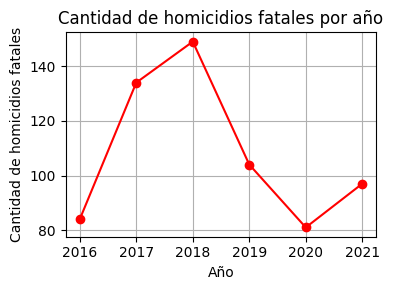

In [18]:
# filtrar los homicidios que resultaron en victimas fatales
homicidios_fatales = df_homicidios[df_homicidios['gravedad'] == 'fatal']

# Contar la cantidad de homicidios fatales por año
homicidios_fatales_por_año = homicidios_fatales.groupby(homicidios_fatales['fecha'].dt.year).size()

# Crear gráfico de líneas
plt.figure(figsize=(4, 3))
plt.plot(homicidios_fatales_por_año.index, homicidios_fatales_por_año.values, marker='o', color='r', linestyle='-')
plt.title('Cantidad de homicidios fatales por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de homicidios fatales')
plt.grid(True)
plt.tight_layout()
plt.show()



Se observa que a partir del año 2016, el número de victimas fatales aumentó constantemente hasta alcanzar su punto máximo en 2017. Sin embargo, el crecimiento fue menor entre 2017 y 2018. Posteriormente, se observa una disminución en los fallecimientos desde 2018 hasta 2020. Sin embargo, es importante destacar que en el año 2020, se observa un repunte en el número de víctimas fatales, revirtiendo la tendencia a la baja de los años anteriores. Podemos decir entonces que estamos en presencia de una tendencia general a la baja en la cantidad de homicidios, con una disminución del 20% entre 2016 y 2021.

* Por último estudiamos la distribución de las variables: 

In [42]:
df_homicidios.describe()

,n_victimas,fecha,franja_horaria,comuna,edad
count,717.000000,717,717.000000,717.000000,664.000000
mean,1.061367,2018-09-09 01:24:21.087866112,11.538354,7.440725,42.167169
min,1.000000,2016-01-01 00:00:00,0.000000,1.000000,1.000000
25%,1.000000,2017-04-01 00:00:00,6.000000,4.000000,27.000000
50%,1.000000,2018-07-07 00:00:00,11.000000,8.000000,37.000000
75%,1.000000,2019-12-18 00:00:00,17.000000,11.000000,56.250000
max,3.000000,2021-12-30 00:00:00,23.000000,15.000000,95.000000
std,0.257024,NaN,6.709265,4.372452,19.788034


## ***Analisis, df_lesiones***:

sabiendo de antemano que el tamaño de este DataFrame es mayor al de homicidios, procedo a analizar si hay duplicados primeramente:

In [19]:
df_lesiones[df_lesiones.duplicated()]

,id_hecho,n_victimas,franja_hora,comuna,tipo_calle,otra_direccion,longitud,latitud,victima,acusado,gravedad,fecha_y,sexo,edad
79,LC-2019-0006638,2,9.0,10,NaN,"Yerbal y Calderon De La Barca, Pedro 0, Barrio...",-58.496239,-34.636075,MOTO,NaN,leve,2019-01-04,masculino,37.0
95,LC-2019-0008238,2,19.0,15,NaN,"De Los Constituyentes Av. 3185, Barrio: Parque...",-58.479158,-34.590782,NaN,NaN,leve,2019-01-04,femenino,69.0
101,LC-2019-0008388,3,20.0,15,NaN,"Lacroze, Federico Av. 4100, Barrio: Chacarita ...",-58.454242,-34.585794,NaN,NaN,leve,2019-01-04,femenino,NaN
118,LC-2019-0008860,3,6.0,4,NaN,"Alcorta, Amancio Av. y Ochoa, Enrique 0, Barri...",-58.412835,-34.655086,TRANSPORTE PUBLICO,NaN,leve,2019-01-05,masculino,67.0
131,LC-2019-0009807,2,20.0,9,NaN,"Asturias Av. 2800, Barrio: Parque Avellaneda ...",-58.465951,-34.658307,NaN,NaN,leve,2019-01-05,masculino,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27194,LC-2021-0628972,8,16.0,11,CALLE,NaN,-58.462417,-34.610534,AUTO,AUTO,leve,2021-12-17,NaN,NaN
27195,LC-2021-0628972,8,16.0,11,CALLE,NaN,-58.462417,-34.610534,AUTO,AUTO,leve,2021-12-17,NaN,NaN
27265,LC-2021-0631292,5,12.0,12,CALLE,NaN,-58.484141,-34.552869,NaN,NaN,GRAVE,2021-12-19,femenino,NaN
27268,LC-2021-0631295,6,12.0,8,CALLE,NaN,-58.480641,-34.679476,NaN,NaN,leve,2021-12-19,femenino,50.0


* cambio el nombre de la columna fecha_y

In [20]:
df_lesiones = df_lesiones.rename(columns={'fecha_y': 'fecha'})

# Verificar el cambio
print(df_lesiones.columns)


Index(['id_hecho', 'n_victimas', 'franja_hora', 'comuna', 'tipo_calle',
       'otra_direccion', 'longitud', 'latitud', 'victima', 'acusado',
       'gravedad', 'fecha', 'sexo', 'edad'],
      dtype='object')


* convierto en minusculas los datos de la columna gravedad

In [21]:
df_lesiones['gravedad'] = df_lesiones['gravedad'].str.lower()

al parecer nos encontramos con varios duplicados, para confirmar esto realizamos consultas

In [22]:
id_hecho_consulta = "LC-2021-0633935"
consulta_resultados = df_lesiones[df_lesiones['id_hecho'] == id_hecho_consulta]
consulta_resultados

,id_hecho,n_victimas,franja_hora,comuna,tipo_calle,otra_direccion,longitud,latitud,victima,acusado,gravedad,fecha,sexo,edad
27310,LC-2021-0633935,3,18.0,7,CALLE,NaN,-58.458854,-34.627548,PEATON,CAMIONETA,leve,2021-12-20,NaN,NaN
27311,LC-2021-0633935,3,18.0,7,CALLE,NaN,-58.458854,-34.627548,PEATON,CAMIONETA,leve,2021-12-20,NaN,NaN
27312,LC-2021-0633935,3,18.0,7,CALLE,NaN,-58.458854,-34.627548,PEATON,CAMIONETA,leve,2021-12-20,femenino,35.0


In [23]:
id_hecho_consulta = "LC-2021-0631292"
consulta_resultados = df_lesiones[df_lesiones['id_hecho'] == id_hecho_consulta]
consulta_resultados

,id_hecho,n_victimas,franja_hora,comuna,tipo_calle,otra_direccion,longitud,latitud,victima,acusado,gravedad,fecha,sexo,edad
27261,LC-2021-0631292,5,12.0,12,CALLE,NaN,-58.484141,-34.552869,NaN,NaN,grave,2021-12-19,masculino,9.0
27262,LC-2021-0631292,5,12.0,12,CALLE,NaN,-58.484141,-34.552869,NaN,NaN,grave,2021-12-19,femenino,52.0
27263,LC-2021-0631292,5,12.0,12,CALLE,NaN,-58.484141,-34.552869,NaN,NaN,grave,2021-12-19,masculino,50.0
27264,LC-2021-0631292,5,12.0,12,CALLE,NaN,-58.484141,-34.552869,NaN,NaN,grave,2021-12-19,femenino,NaN
27265,LC-2021-0631292,5,12.0,12,CALLE,NaN,-58.484141,-34.552869,NaN,NaN,grave,2021-12-19,femenino,NaN


Tras revisar los resultados obtenidos, podemos observar que las columnas "sexo" y "edad" presentan diferencias entre los supuestos duplicados. Esto sugiere que, en realidad, no se trata de registros duplicados, sino más bien de un mismo accidente con múltiples víctimas. No consideramos necesario llevar a cabo una normalización de los datos dado que la informacion sobre la edad y el sexo de las victimas nos resulta importante al momento de analizar por ejemplo la edad promedio de las victimas en los accidentes.

In [24]:
print('hay',df_lesiones.duplicated().sum(),'casos con mas de 1 victima')

hay 639 casos con mas de 1 victima


* **realizaremos un analisis de correlacion entre variables para estudiar si hay alguna relacion entre la edad y el estado de gravedad de la victima, para esto antes realizamos una codificadcion de datos suponiendo que 'leve' = 1, 'GRAVE' = 2:**

In [25]:
# Definir un diccionario de mapeo de categorías a valores numéricos
mapeo_gravedad = {'leve': 1, 'grave': 2}

# Aplicar el mapeo a la columna 'gravedad'
df_lesiones['gravedad_codificada'] = df_lesiones['gravedad'].map(mapeo_gravedad)

# Verificar los resultados
print(df_lesiones[['gravedad', 'gravedad_codificada']].head())


  gravedad  gravedad_codificada
0     leve                  1.0
1     leve                  1.0
2     leve                  1.0
3     leve                  1.0
4     leve                  1.0


seleccionamos las variables que nos interesa estudiar:

In [26]:
df_correlacion = df_lesiones[['edad', 'gravedad_codificada']]


creamos matriz de correlacion:

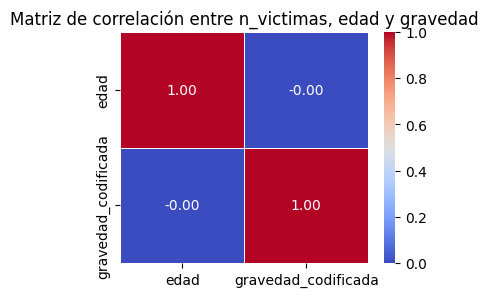

In [27]:
matriz_correlacion = df_correlacion.corr()

# Crear un mapa de calor
plt.figure(figsize=(4, 3))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matriz de correlación entre n_victimas, edad y gravedad")
plt.show()

como podemos observar, los coeficientes de correlacion entre edad y gravedad son negativos y cero, lo que quiere decir que estas variables no se encuentran relacionadas en terminos de relacion lineal.

* observamos entonces el valor mas frecuente en la edad: 

In [28]:
edad_mas_frecuente = df_lesiones['edad'].mode()[0]
print("La edad más frecuente en el conjunto de datos es:", edad_mas_frecuente)

La edad más frecuente en el conjunto de datos es: 28.0


*  **Analizamos porcentajes de valores unicos en las columnas tipo_calle, victima, acusado, gravedad y sexo para ver el dato con mayor presencia en cada una de las columnas y realizar conclusiones**

In [29]:
# porcentaje de ocurrencia para cada valor en la columna 'tipo_calle'
porcentaje_ocurrencia = df_lesiones['tipo_calle'].value_counts(normalize=True) * 100

print(porcentaje_ocurrencia)


tipo_calle
AVENIDA      53.053876
CALLE        42.020518
GRAL PAZ      4.592703
AUTOPISTA     0.332903
Name: proportion, dtype: float64


In [30]:
# porcentaje de ocurrencia para cada valor en la columna 'victima'
porcentaje_ocurrencia = df_lesiones['victima'].value_counts(normalize=True) * 100

print(porcentaje_ocurrencia)

victima
MOTO                  40.112344
AUTO                  17.616405
CICLISTA              15.315376
PEATON                14.591229
TRANSPORTE PUBLICO     6.124797
CAMIONETA              1.739307
TAXI                   1.671630
MOVIL                  0.940715
MIXTO                  0.764754
CAMION                 0.649702
MONOPATIN              0.189496
OTRO                   0.175961
UTILITARIO             0.108284
Name: proportion, dtype: float64


In [31]:
# porcentaje de ocurrencia para cada valor en la columna 'acusado'
porcentaje_ocurrencia = df_lesiones['acusado'].value_counts(normalize=True) * 100

print(porcentaje_ocurrencia)

acusado
AUTO                  53.367769
TRANSPORTE PUBLICO    12.272727
CAMIONETA             10.196281
MOTO                   7.737603
TAXI                   6.694215
CAMION                 3.595041
OBJETO FIJO            3.429752
MOVIL                  1.022727
CICLISTA               0.929752
UTILITARIO             0.299587
OTRO                   0.258264
PEATON                 0.165289
MONOPATIN              0.030992
Name: proportion, dtype: float64


In [32]:
# porcentaje de ocurrencia para cada valor en la columna 'gravedad'
porcentaje_ocurrencia = df_lesiones['gravedad'].value_counts(normalize=True) * 100

print(porcentaje_ocurrencia)

gravedad
leve     97.057758
grave     2.934995
fatal     0.007247
Name: proportion, dtype: float64


* normalizo los datos de la columna sexo:

In [33]:
df_lesiones['sexo'].replace('Mujer ', 'femenino', inplace=True)

In [34]:
# porcentaje de ocurrencia para cada valor en la columna 'sexo'
porcentaje_ocurrencia = df_lesiones['sexo'].value_counts(normalize=True) * 100

print(porcentaje_ocurrencia)

sexo
masculino    67.075286
femenino     32.924714
Name: proportion, dtype: float64


Basandonos en los resultados obtenidos de los cálculos previos realizados para los atributos de tipo de calle, victima, acusado, gravedad y sexo, podemos extraer varias conclusiones significativas. 
* Más del 50% de los accidentes ocurren en avenidas,suponemos que dado que gral paz es una avenida y tambien se encuentra revelado en el analisis, estimamos que ese 50% de accidentes en avenidas incluye la avenida general paz. Además, observamos que aproximadamente el 40% de las víctimas son motociclistas, seguidos por automovilistas y ciclistas.

* En cuanto a los acusados, más del 50% son conductores de automóviles, mientras que el resto se divide entre el transporte público, con un 12.27% como segundo acusado, y los monopatines, que representan una proporción mínima del 0.03%. Además de los accidentes, es importante destacar que solo el 2% de los casos son de gravedad y un 0.007% son fatales.

* Finalmente, el género masculino es el más frecuente en los accidentes, representando aproximadamente el 67% de los casos. Estas conclusiones resaltan patrones significativos que pueden ser fundamentales para futuras estrategias de prevención de accidentes y seguridad vial

Analizamos la distribucion de las variables: 

In [43]:
df_lesiones.describe()

,n_victimas,franja_hora,longitud,latitud,fecha,edad,gravedad_codificada,año
count,27598.000000,27590.000000,2.594200e+04,2.594200e+04,27598,23127.000000,27596.000000,27598.000000
mean,1.422494,13.546212,-2.247891e+05,-1.339060e+05,2020-05-27 16:46:17.940430592,37.725689,1.029352,2019.897166
min,1.000000,0.000000,-5.829963e+09,-3.472891e+09,2019-01-01 00:00:00,0.000000,1.000000,2019.000000
25%,1.000000,10.000000,-5.847814e+01,-3.463412e+01,2019-07-13 00:00:00,27.000000,1.000000,2019.000000
50%,1.000000,14.000000,-5.844260e+01,-3.461362e+01,2020-03-16 12:00:00,35.000000,1.000000,2020.000000
75%,1.000000,18.000000,-5.840545e+01,-3.459119e+01,2021-04-05 00:00:00,46.000000,1.000000,2021.000000
max,16.000000,23.000000,-5.835346e+01,-3.453466e+01,2021-12-31 00:00:00,100.000000,2.000000,2021.000000
std,1.087866,5.596457,3.619629e+07,2.156202e+07,NaN,15.216879,0.168794,0.860914


# ***Analisis df_lesiones y df_homicidios:***

* **A continuacion realizaré un analisis de tendencia segun los datos del archivo de homicidios y lesiones juntos para a su vez poder comparar y completar el analisis:**

In [35]:
# seleccionar el año de la columna fecha
df_lesiones['año'] = df_lesiones['fecha'].dt.year

resultados = df_lesiones.groupby(['año', 'gravedad']).size().unstack(fill_value=0)

In [36]:
# filtrar los homicidios que resultaron en victimas fatales
homicidios_fatales = df_homicidios[df_homicidios['gravedad'] == 'fatal']

# Contar la cantidad de homicidios fatales por año
homicidios_fatales_por_año = homicidios_fatales.groupby(homicidios_fatales['fecha'].dt.year).size()

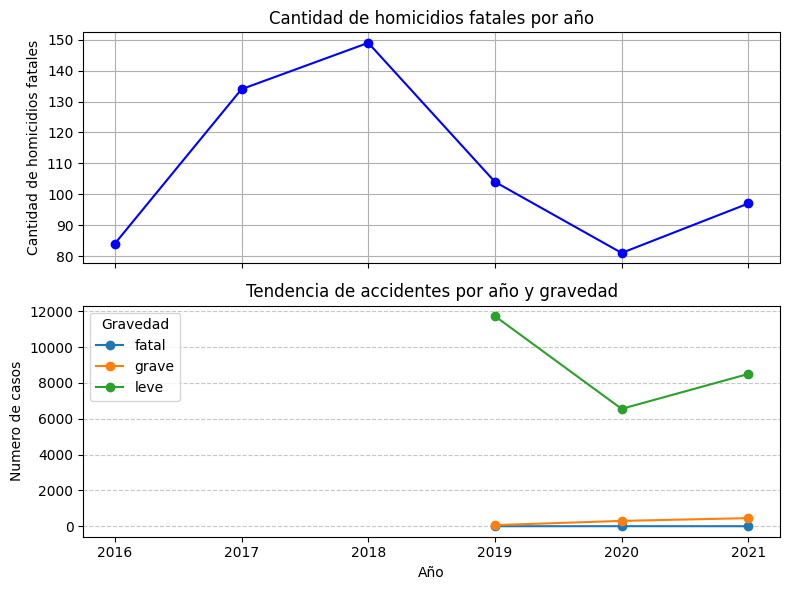

In [37]:
# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Graficar homicidios fatales por año
ax1.plot(homicidios_fatales_por_año.index, homicidios_fatales_por_año.values, marker='o', color='b', linestyle='-')
ax1.set_title('Cantidad de homicidios fatales por año')
ax1.set_ylabel('Cantidad de homicidios fatales')
ax1.grid(True)

# Graficar tendencia de accidentes por año y gravedad
resultados.plot(kind='line', marker='o', ax=ax2)
ax2.set_title('Tendencia de accidentes por año y gravedad')
ax2.set_xlabel('Año')
ax2.set_ylabel('Numero de casos')
ax2.legend(title='Gravedad')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar diseño y mostrar el grafico
plt.tight_layout()
plt.show()

Teniendo en cuenta que el grafico de homicidios por año representa en su mayoria los hechos reales de accidentes fatales, se decidio analizarlo por separado al de lesiones considerando que este ultimo mencionado solamente informa de los accidentes categorizando en grave o leve la mayoria de los casos con un porcentaje menor de los registrados fatales. 

sin embargo, ademas de las victimas fatales, se observan entre 12000 y 6000 casos de lesiones leves entre 2019 y 2021, y a su vez una disminucion de las victimas fatales en este mismo periodo. Esto se puede deber a los años de pandemia que se atravesaron y a la baja circulacion de vehiculos entonces.

* **Analicemos ahora las victimas por franja horaria y dia de semana para ambos DataFrame:**

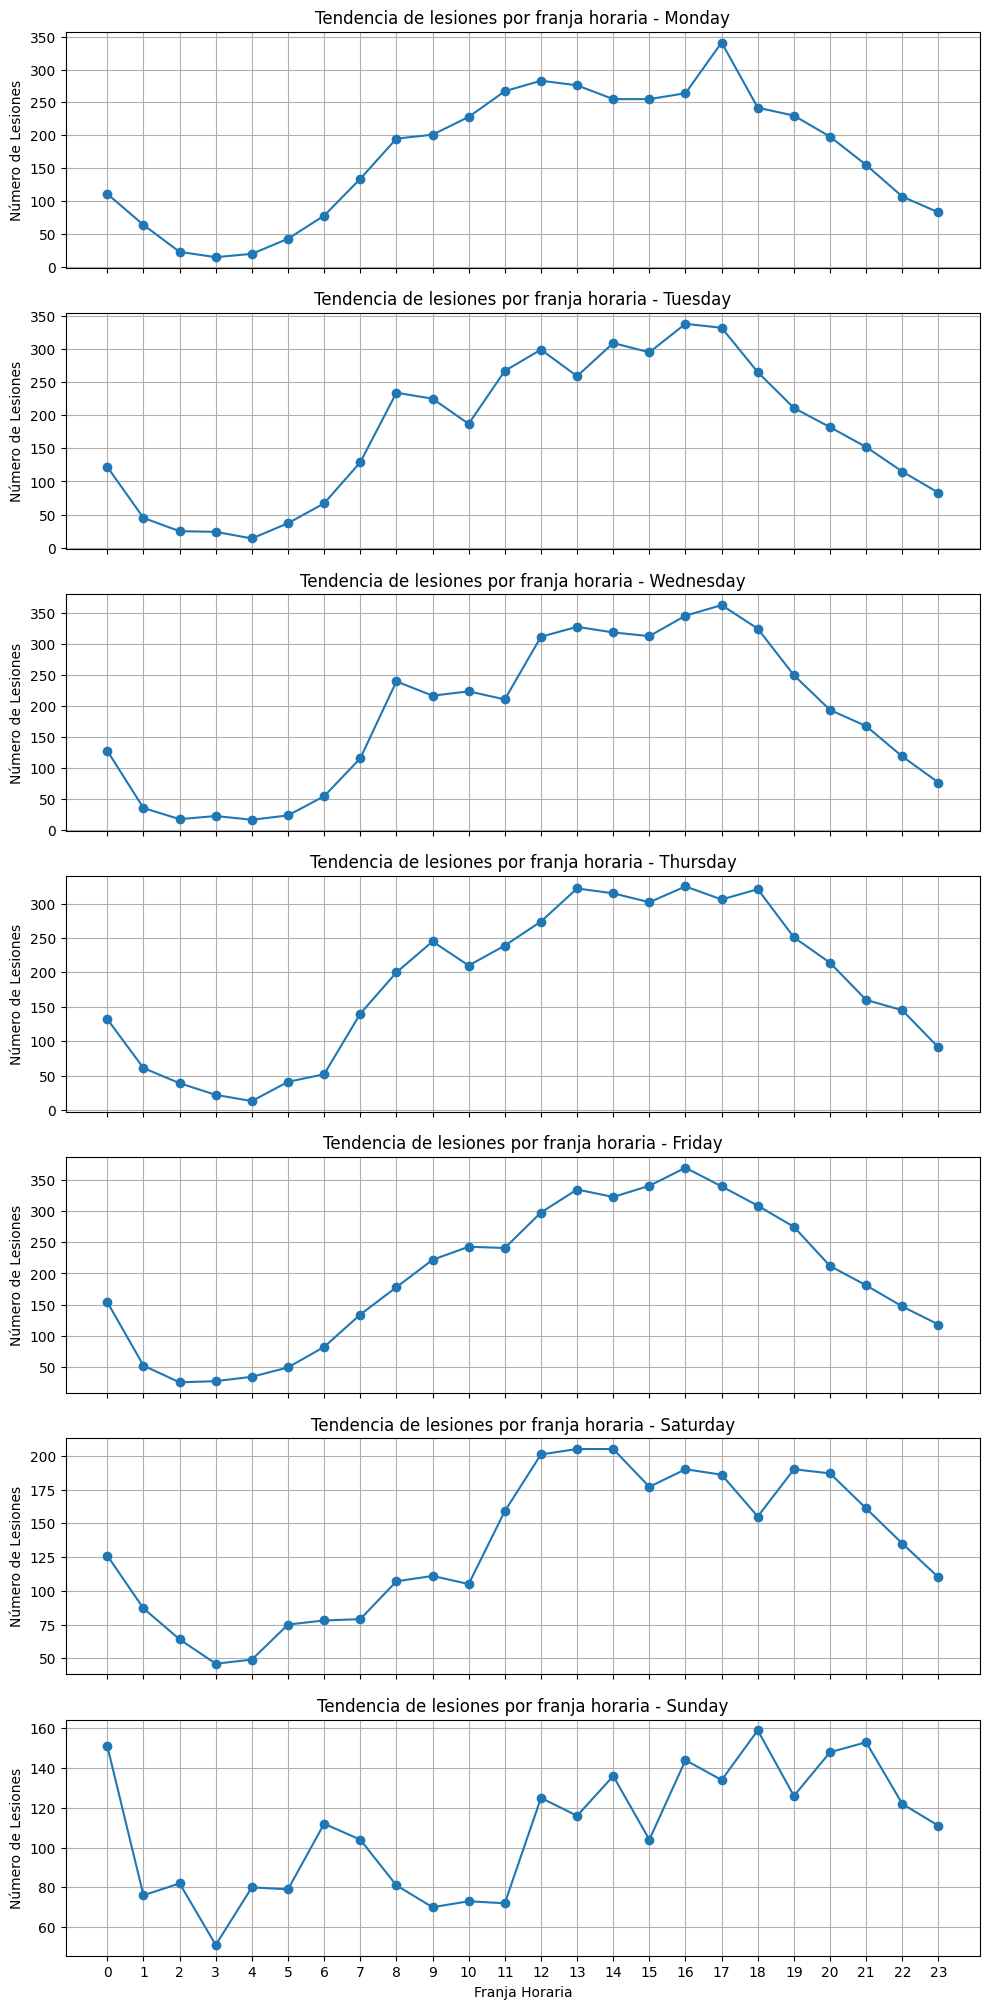

In [38]:
# Convertir la columna 'fecha' en tipo datetime si aún no lo está
df_lesiones['fecha'] = pd.to_datetime(df_lesiones['fecha'])

# Obtener el día de la semana para cada fecha en df_lesiones
df_lesiones['dia_semana'] = df_lesiones['fecha'].dt.day_name()

# Contar la cantidad de casos por franja horaria y día de la semana en df_lesiones
conteo_por_dia_y_franja_horaria = df_lesiones.groupby(['dia_semana', 'franja_hora']).size().unstack(fill_value=0)

# Crear figura y ejes
fig, axs = plt.subplots(7, 1, figsize=(10, 20), sharex=True)

# Lista de días de la semana en el orden deseado
dias_semana_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Iterar sobre cada día de la semana
for i, dia in enumerate(dias_semana_ordenados):
    # Obtener el conteo de casos por franja horaria para el día de la semana actual
    conteo_por_franja_horaria = conteo_por_dia_y_franja_horaria.loc[dia]
    
    # Gráfico de tendencia por franja horaria para el día de la semana actual
    axs[i].plot(conteo_por_franja_horaria.index, conteo_por_franja_horaria.values, marker='o', linestyle='-')
    axs[i].set_title(f'Tendencia de lesiones por franja horaria - {dia}')
    axs[i].set_ylabel('Número de Lesiones')
    axs[i].grid(True)

# Ajustar diseño y mostrar gráficos
plt.xticks(range(24))
plt.tight_layout()
plt.xlabel('Franja Horaria')
plt.show()

Tras analizar detenidamente los gráficos, podemos observar lo siguiente : 
* Tendencia marcada de aumento en los accidentes con lesiones durante los ***días laborables, especialmente entre las 5:00 y las 17:00 horas***, alcanzando un ***máximo*** *cercano a las 17:00 horas con hasta 350 lesiones registradas*. Posteriormente, se observa una disminución gradual en la cantidad de casos.
* ***Los fines de semana*** presentan un patrón diferente:
    - ***los sábados***, alrededor de la medianoche, se registra un pico de aproximadamente 125 accidentes, con una marcada reducción después de las 3:00 horas. Luego, se observa un repunte entre las 5:00 y las 10:00 horas, alcanzando un máximo entre las 12:00 y las 14:00 horas, seguido de una disminución gradual.
    - ***Los domingos*** también muestran un número considerable de accidentes alrededor de la medianoche, con más de 140 casos, seguido de una disminución entre la 1:00 y las 3:00 de la madrugada. A lo largo del día, se mantienen cifras entre 70 y 120 casos aproximadamente, siendo el domingo el día con menos accidentes registrados en general.

En resumen, Los días con mayor frecuencia de homicidios son el lunes, viernes y sábado, mientras que las franjas horarias con mayor frecuencia son entre las 12:00 y las 14:00 horas, y entre las 14:00 y las 17:00 horas.

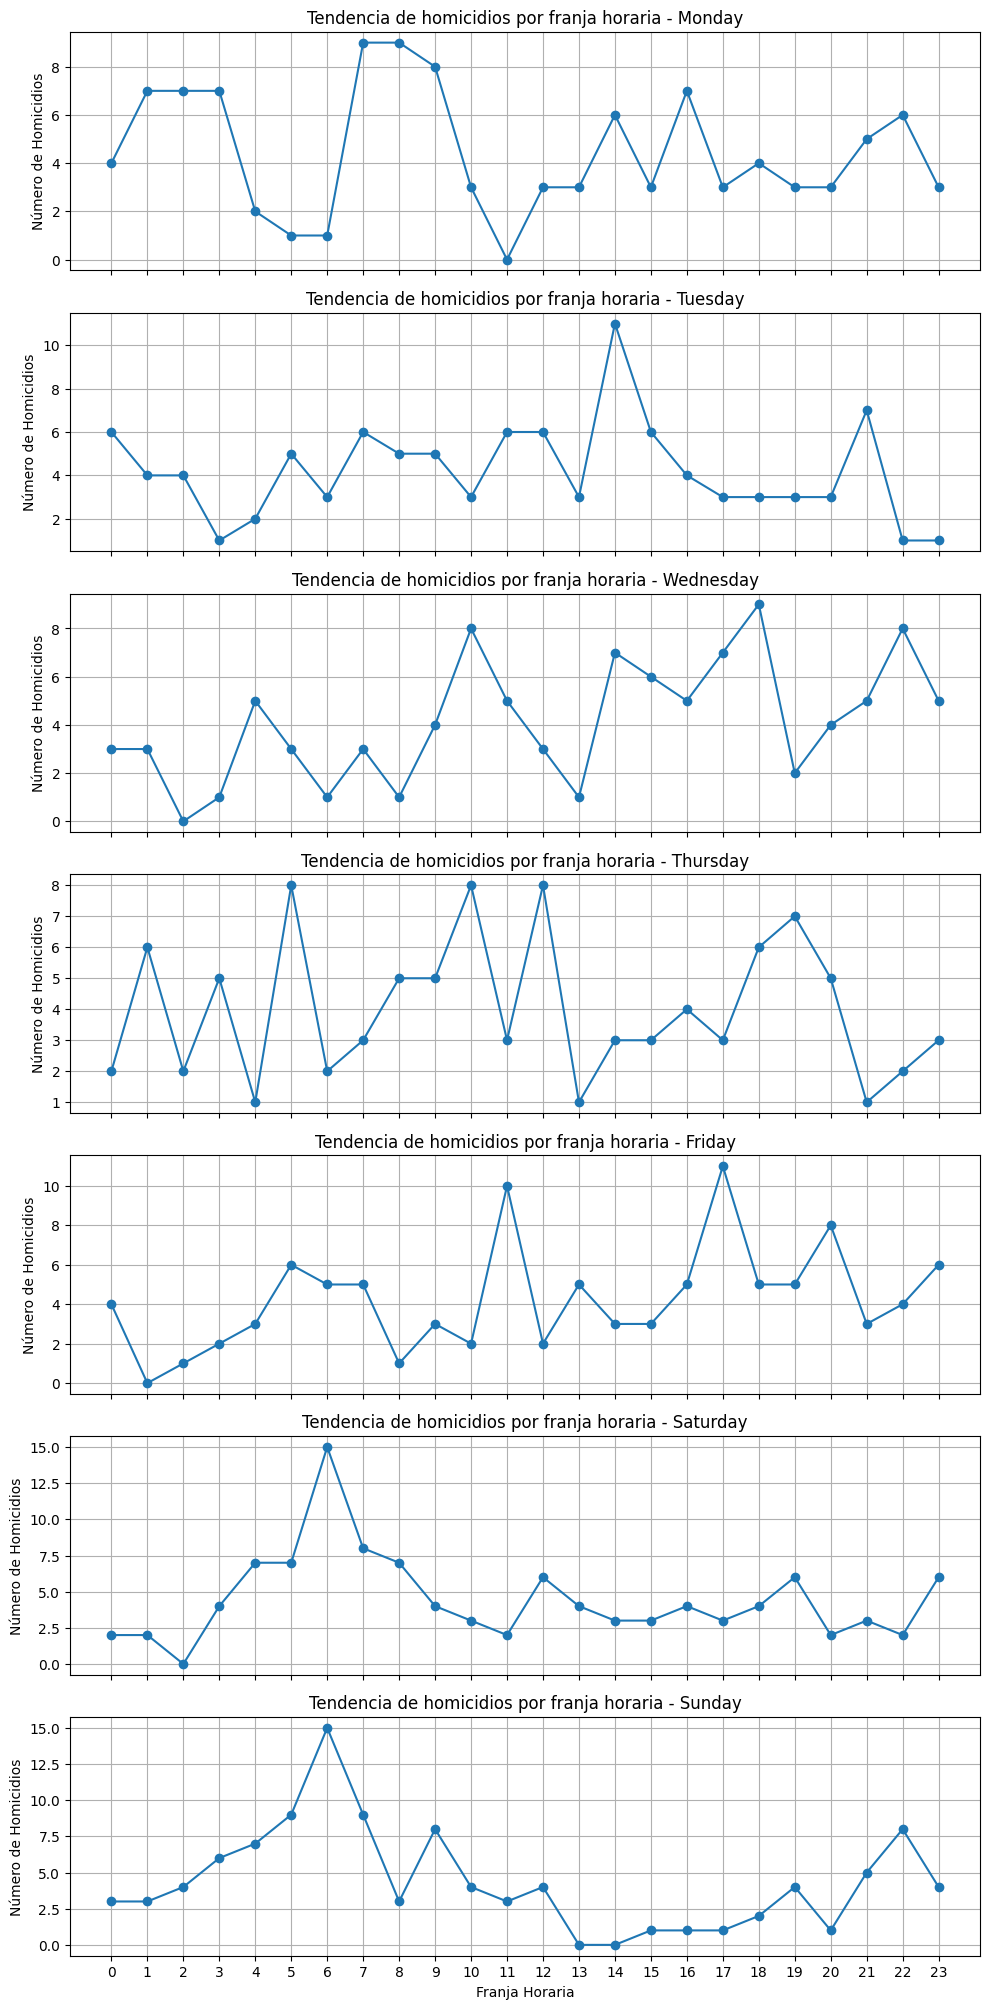

In [39]:
# Convertir la columna 'fecha' en tipo datetime si aún no lo está
df_homicidios['fecha'] = pd.to_datetime(df_homicidios['fecha'])

# Obtener el día de la semana para cada fecha en df_homicidios
df_homicidios['dia_semana'] = df_homicidios['fecha'].dt.day_name()

# Contar la cantidad de casos por franja horaria y día de la semana en df_homicidios
conteo_por_dia_y_franja_horaria = df_homicidios.groupby(['dia_semana', 'franja_horaria']).size().unstack(fill_value=0)

# Crear figura y ejes
fig, axs = plt.subplots(7, 1, figsize=(10, 20), sharex=True)

# Lista de días de la semana en el orden deseado
dias_semana_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Iterar sobre cada día de la semana
for i, dia in enumerate(dias_semana_ordenados):
    # Obtener el conteo de casos por franja horaria para el día de la semana actual
    conteo_por_franja_horaria = conteo_por_dia_y_franja_horaria.loc[dia]
    
    # Gráfico de tendencia por franja horaria para el día de la semana actual
    axs[i].plot(conteo_por_franja_horaria.index, conteo_por_franja_horaria.values, marker='o', linestyle='-')
    axs[i].set_title(f'Tendencia de homicidios por franja horaria - {dia}')
    axs[i].set_ylabel('Número de Homicidios')
    axs[i].grid(True)

# Ajustar diseño y mostrar gráficos
plt.xticks(range(24))
plt.tight_layout()
plt.xlabel('Franja Horaria')
plt.show()

En el caso de los homicidios fatales podemos observar lo siguiente: 
* los lunes se presenta un maximo de hasta 8 fallecidos y un minimo de por lo menos una victima. A lo largo del dia se van presentado subas y bajas en la cantidad de accidentes fatales
* los martes La frecuencia de homicidios es relativamente constante durante todo el día, con un aumento relevante entre las 13:00 y las 15:00 horas con un maximo de hasta 11 victimas
* los Miércoles: Se observa un pico de homicidios entre las 10:00 y las 14:00 horas, con un maximo de hasta 10 homicidios y un minimo de por lo menos 1 homicidio.
* los Jueves: se presentan maximos importantes entre la 1 y  de la madrugada, luego dos horarios importantes que tambien marcan maximos son entre las 10:00 y las 12:00 horas con un total de hasta 8 homicidios
* los Viernes: Se observa un pico de homicidios entre las 12:00 y las 17:00 horas, con una frecuencia de hasta 15 homicidios. El resto del dia se mantiene en un rago de 8 y 1 victimas
* los Sábado: La frecuencia de homicidios es relativamente alta durante todo el día, con un pico a las 6:00 horas, donde se registran hasta 15 homicidios.
* el Domingo: La frecuencia de homicidios es relativamente baja durante todo el día, con un pico a las 6:00 horas.

En conclusion, los datos sugieren que los homicidios fatales tienden a ocurrir en diferentes momentos del día según el día de la semana, con algunos días mostrando patrones más definidos que otros.

* en resumen graficamente :

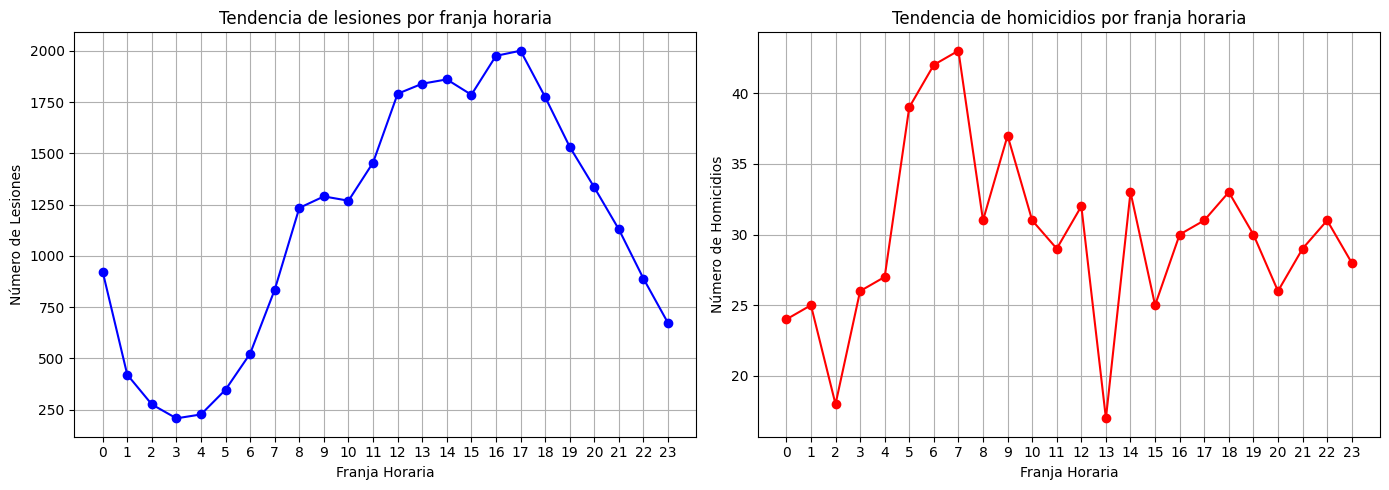

In [40]:
# conteo cantidad de casos por franja horaria en df_lesiones
conteo_por_franja_horaria_lesiones = df_lesiones['franja_hora'].value_counts().sort_index()

# conteo cantidad de casos por franja horaria en df_homicidios
conteo_por_franja_horaria_homicidios = df_homicidios['franja_horaria'].value_counts().sort_index()

# Crear figura y ejes
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Grafico de tendencia por franja horaria para lesiones
axs[0].plot(conteo_por_franja_horaria_lesiones.index, conteo_por_franja_horaria_lesiones.values, marker='o', color='b', linestyle='-')
axs[0].set_title('Tendencia de lesiones por franja horaria')
axs[0].set_xlabel('Franja Horaria')
axs[0].set_ylabel('Número de Lesiones')
axs[0].grid(True)
axs[0].set_xticks(conteo_por_franja_horaria_lesiones.index)

# Gráfico de tendencia por franja horaria para homicidios
axs[1].plot(conteo_por_franja_horaria_homicidios.index, conteo_por_franja_horaria_homicidios.values, marker='o', color='r', linestyle='-')
axs[1].set_title('Tendencia de homicidios por franja horaria')
axs[1].set_xlabel('Franja Horaria')
axs[1].set_ylabel('Número de Homicidios')
axs[1].grid(True)
axs[1].set_xticks(conteo_por_franja_horaria_homicidios.index)

# Ajustar diseño y mostrar gráficos
plt.tight_layout()
plt.show()

Por ultimo, estos graficos resumen los dias de la semana mostrando unicamente los picos en las franjas horarias durante los años 2016 a 2021. 
podemos observar que los casos de lesiones son mayor a los casos de homicidios fatales. 

Tambien se observa que los accidentes de lesiones aumentan a partir de las 4 de la mñana a lo largo del dia y disminuyen pasadas las 17, mientras que los accidentes fatales no muestran una frecuencia marcada salvo en el rango de 4:00 a 7:00 de la mañana.

***

En conclusión general y final, los días con más accidentes de homicidios fatales son el viernes y el sábado, con picos entre las 12:00 y las 17:00 horas, y a las 6:00 horas, respectivamente.Podemos considerar que estos accidentes surgen en consecuencia a la llegada del fin de semana y mayor consumo de alcohol.

En cuanto a los accidentes con lesiones, se observa un aumento a partir de las 4:00 de la mañana, alcanzando un máximo cerca de las 17:00 horas. Los homicidios fatales muestran picos marcados en diferentes días de la semana, mientras que los accidentes con lesiones muestran una tendencia más constante a lo largo del día, con un aumento significativo durante la mañana y la tarde.

***